<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_03_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 1 (Sistemas Lineares - Eliminação Gaussiana)

In [4]:
import numpy as np

def linear_ngaussel(A, b):
    n = len(b)
    x = np.zeros(n)

    # Realiza a eliminação direta (forward elimination)
    for k in range(n-1):
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            for j in range(k+1, n):
                A[i, j] = A[i, j] - m * A[k, j]
            b[i] = b[i] - m * b[k]

    # Realiza a substituição reversa (back substitution)
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        S = b[i]
        for j in range(i+1, n):
            S = S - A[i, j] * x[j]
        x[i] = S / A[i, i]

    return x


In [7]:
A = np.array([[1.0, 1.0, -1.0],
              [2.0, -1.0, 3.0],
              [3.0, 2.0, -2.0]])
b = np.array([2.0, 5.0, 5.0])

cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b)
print(f'x={x}')

cond(A)=37.80066079528044
x=[1. 3. 2.]


In [ ]:
A = np.array([[1,1,1],
              [1,-1,1],
              [-1,1,-1]])
b = np.array([-2,2,-2])
cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b)

print(f'x={x}')


cond(A)=5.159149189263314e+16
x=[nan nan nan]


<ipython-input-1-795f6dc8c473>:16: RuntimeWarning: invalid value encountered in scalar divide
  x[n-1] = b[n-1] / A[n-1, n-1]


In [9]:
A = np.array([[1.0,2.0,-3.0],
              [2.0,-1.0,1.0],
              [3.0,2.0,-1.0]])
b = np.array([4.0,1.0,5.0])

cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b)
print(f'x={x}')

cond(A)=6.118463514164541
x=[ 1.08333333  0.58333333 -0.58333333]


In [8]:
A = np.array([[6.0,1.0,0.0,-3.0],
              [-2.0,8.0,2.0,3.0],
              [1.0,-6.0,10.0,-2.0],
              [2.0,1.0,3.0,9.0]])
b = np.array([-9.0,9.0,17.0,13.0])

cond_A = np.linalg.cond(A)
print(f'cond(A)={cond_A}')

x = linear_ngaussel(A, b)
print(f'x={x}')

cond(A)=2.0227322205378355
x=[-1.  0.  2.  1.]


# Problema 2 (Extração Líquido-Líquido)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_LU(A):
    n = A.shape[0]
    U = np.zeros((n, n))
    L = np.eye(n)  # coloca 1 na diagonal

    for k in range(n - 1):
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k] = m  # armazena entrada para L
            for j in range(k + 1, n):
                A[i, j] = A[i, j] - m * A[k, j]

    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j]

    for i in range(1, n):
        for j in range(i):
            L[i, j] = A[i, j]

    return L, U

def linear_LU_forward_back(L, U, b):
    n = len(b)

    # Realiza a substituição direta (forward substitution)
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i, j] * y[j]

    # Realiza a substituição reversa (back substitution)
    x = np.zeros(n)
    x[n-1] = y[n-1] / U[n-1, n-1]
    for i in range(n-2, -1, -1):
        S = y[i]
        for j in range(i+1, n):
            S = S - U[i, j] * x[j]
        x[i] = S / U[i, i]

    return x

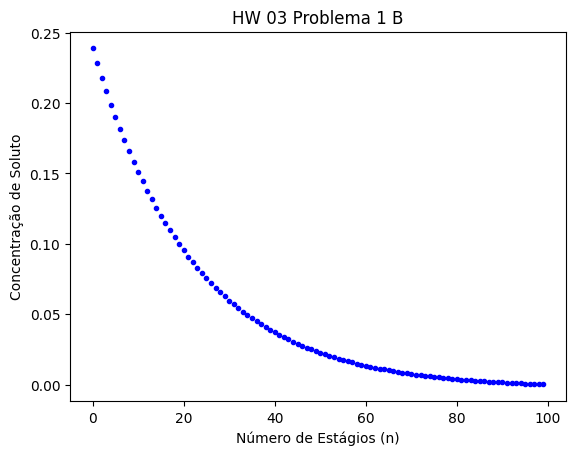

In [ ]:
# Dados do Problema
n = 100     # Número de Estágios
S = 40.0  # Vazão do solvente (kg/h)
F = 65.0  # Vazão da alimentação (kg/h)
y0 = 0.0    # Concentração inicial de soluto no solvente
K = 1.7    # Constante de Equilíbrio
x0 = 0.25  # Concentração inicial de soluto na alimentação

# Inicializar/Alocar variáveis
A = np.zeros((n, n))
b = np.zeros(n)
x = np.zeros(n)

# Montar o Sistema de Equações
for i in range(n):
    if i == 0:
        A[i, 0] = -(F + S * K)
        A[i, 1] = S * K
        b[i] = -x0*F
    elif i == n - 1:
        A[i, n - 2] = F
        A[i, n - 1] = -(F + K * S)
        b[i] = -y0 * S
    else:
        A[i, i - 1] = F
        A[i, i] = -(F + K * S)
        A[i, i + 1] = K * S

# Chamar a Função de Decomposição LU
# Eliminação (Forward) para obter L e U
L, U = linear_LU(A)

# Chamar a Função de Substituição (Forward) Ly = b
# Substituição (Backward) Ux = y
x = linear_LU_forward_back(L, U, b)

# Plotar o Gráfico
for i in range(n):
    plt.plot(i, x[i], '.-b')
plt.xlabel('Número de Estágios (n)')
plt.ylabel('Concentração de Soluto')
plt.title('HW 03 Problema 1 B')
plt.show()

# Problema 3 (a)

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
for i in range(n):
    for j in range(n):
        if i==j:
            A[i,j]=5    # Todos os coeficientes da diagonal principal de A são 5
        elif j==i-1:
            A[i,j]=-2   # Todos os coeficientes da diagonal inferior de A são -2
        elif j==i+1:
            A[i,j]=-3   # Todos os coeficientes da diagonal superior de A são -3

# O vetor b é um vetor unitário:
b = np.ones(n)

In [ ]:
# Letra A: Resolvendo o sistema Ax = b por Eliminação Gaussiana Simples

def eliminacao_gaussiana(A, b):
    n = len(b)      # Determinar o tamanho do vetor b
    x = np.zeros(n) # Criar um vetor de zeros (n x 1)

    # Realiza a eliminação direta (forward elimination)
    for k in range(n-1):       # Fazer varreduras k = 0,1,2,..., n-2
        for i in range(k+1, n): # Correr as Linhas abaixo da diagonal: i = k+1, k+2, ..., n-1
            m = A[i, k] / A[k, k]   # Calcular a constante de multiplicação. A[k,k] é o elemento da diagonal!
            for j in range(k+1, n): # Correr as Colunas acima da diagonal: j = k+1, k+2,..., n-1
                A[i, j] = A[i, j] - m * A[k, j]    # Calcular os novos coeficientes da linha i
            b[i] = b[i] - m * b[k]                 # Calcular o novo coeficiente do vetor b na linha i

    # Realiza a substituição reversa (back substitution)
    x[n-1] = b[n-1] / A[n-1, n-1]   # Calcular a última variável, linha i = n-1
    for i in range(n-2, -1, -1):    # Correr as linhas de baixo para cima: i=n-2, n-3, ..., 0
        S = b[i]                    # Inicializar o somatório
        for j in range(i+1, n):     # Correr as colunas acima da diagonal: j=i+1, i+2, ..., n-1
            S = S - A[i, j] * x[j]  # Atualizar o somatório
        x[i] = S / A[i, i]          # Calcular o valor da variávei x[i]

    return x

x = eliminacao_gaussiana(A,b)
print("O vetor de solução do sistema calculado através da Eliminação Gaussiana Simples é: \n")
print(x)

O vetor de solução do sistema calculado através da Eliminação Gaussiana Simples é: 

[32.66666667 54.11111111 68.07407407 77.04938272 82.69958848 86.13305898
 88.08870599 89.05913733 89.37275822 89.24850548 88.83233699 88.22155799
 87.48103866 86.65402577 85.76935052 84.84623368 83.89748912 82.93165941
 81.95443961 80.96962641 79.97975094 78.98650062 77.99100042 76.99400028
 75.99600019 74.99733346 73.9982223  72.99881487 71.99920991 70.99947328
 69.99964885 68.9997659  67.99984393 66.99989596 65.99993064 64.99995376
 63.99996917 62.99997945 61.9999863  60.99999087 59.99999391 58.99999594
 57.99999729 56.9999982  55.9999988  54.9999992  53.99999947 52.99999964
 51.99999976 50.99999984 49.99999989 48.99999993 47.99999995 46.99999997
 45.99999998 44.99999999 43.99999999 42.99999999 42.         41.
 40.         39.         38.         37.         36.         35.
 34.         33.         32.         31.         30.         29.
 28.         27.         26.         25.         24.         23

# Problema 3 (b)

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
for i in range(n):
    for j in range(n):
        if i==j:
            A[i,j]=5    # Todos os coeficientes da diagonal principal de A são 5
        elif j==i-1:
            A[i,j]=-2   # Todos os coeficientes da diagonal inferior de A são -2
        elif j==i+1:
            A[i,j]=-3   # Todos os coeficientes da diagonal superior de A são -3

# O vetor b é um vetor unitário:
b = np.ones(n)

In [ ]:
# Letra B:
# Resolvendo o sistema Ax = b pelo Método de Jacobi

# Chute inicial para o vetor x:
x_initial = 5*np.ones(n)

def linear_jacobi(A, b, x):
    # A = matriz de coeficientes n x n
    # b = vetor coluna n x 1
    # x = vetor coluna de suposições iniciais n x 1
    n = len(b)
    tol = 1e-3  # tolerância para convergência
    count = 0
    count_max = 1e4  # número máximo de iterações
    err = np.linalg.norm(np.dot(A, x) - b)  # critério de convergência

    while err > tol:
        xold = x.copy()  # armazena os valores antigos de x

        # Atualiza x usando o método iterativo de Jacobi
        x[0] = b[0] / A[0, 0]
        for i in range(1, n):
            S = b[i]
            for j in range(1, i):
                S = S - A[i, j] * xold[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * xold[j]
            x[i] = S / A[i, i]

        count += 1

        # Verifica se o número máximo de iterações foi atingido
        if count > count_max:
            print(f'Não convergiu na iteração {count}.')
            break

        # Calcula o erro e exibe na tela
        err = np.linalg.norm(np.dot(A, x) - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

x = linear_jacobi(A,b,x_initial)
print("\nO vetor de solução do sistema calculado através do Método de Jacobi é: \n")
print(x)

A saída de streaming foi truncada nas últimas 5000 linhas.
k = 5022 	 erro = 9.7001e+01
k = 5023 	 erro = 9.7001e+01
k = 5024 	 erro = 9.7001e+01
k = 5025 	 erro = 9.7001e+01
k = 5026 	 erro = 9.7001e+01
k = 5027 	 erro = 9.7001e+01
k = 5028 	 erro = 9.7001e+01
k = 5029 	 erro = 9.7001e+01
k = 5030 	 erro = 9.7001e+01
k = 5031 	 erro = 9.7001e+01
k = 5032 	 erro = 9.7001e+01
k = 5033 	 erro = 9.7001e+01
k = 5034 	 erro = 9.7001e+01
k = 5035 	 erro = 9.7001e+01
k = 5036 	 erro = 9.7001e+01
k = 5037 	 erro = 9.7001e+01
k = 5038 	 erro = 9.7001e+01
k = 5039 	 erro = 9.7001e+01
k = 5040 	 erro = 9.7001e+01
k = 5041 	 erro = 9.7001e+01
k = 5042 	 erro = 9.7001e+01
k = 5043 	 erro = 9.7001e+01
k = 5044 	 erro = 9.7001e+01
k = 5045 	 erro = 9.7001e+01
k = 5046 	 erro = 9.7001e+01
k = 5047 	 erro = 9.7001e+01
k = 5048 	 erro = 9.7001e+01
k = 5049 	 erro = 9.7001e+01
k = 5050 	 erro = 9.7001e+01
k = 5051 	 erro = 9.7001e+01
k = 5052 	 erro = 9.7001e+01
k = 5053 	 erro = 9.7001e+01
k = 5054 	 er

# Problema 3 (c)

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
for i in range(n):
    for j in range(n):
        if i==j:
            A[i,j]=5    # Todos os coeficientes da diagonal principal de A são 5
        elif j==i-1:
            A[i,j]=-2   # Todos os coeficientes da diagonal inferior de A são -2
        elif j==i+1:
            A[i,j]=-3   # Todos os coeficientes da diagonal superior de A são -3

# O vetor b é um vetor unitário:
b = np.ones(n)

In [ ]:
# Letra C:
# Resolvendo o sistema Ax = b pelo Método de Gauss-Seidel

# Chute inicial para o vetor x:
x_initial = np.ones(n)

def linear_gauss_seidel(A, b, x):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de chutes iniciais
    n = len(b)
    tol = 1e-6  # tolerância para convergência
    count = 0
    count_max = 1e4  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:

        # primeira entrada
        i = 0
        S = b[i]
        for j in range(1, n):
            S = S - A[i, j] * x[j]
        x[0] = S / A[i, i]

        # entradas interiores
        for i in range(1, n - 1):
            S = b[i]
            for j in range(i):
                S = S - A[i, j] * x[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * x[j]
            x[i] = S / A[i, i]

        # última entrada
        i = n - 1
        S = b[i]
        for j in range(n - 1):
            S = S - A[i, j] * x[j]
        x[n - 1] = S / A[i, i]

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

x = linear_gauss_seidel(A,b,x_initial)
print("\nO vetor de solução do sistema calculado através do Método Gauss-Seidel é: \n")
print(x)

k = 1 	 erro = 2.6451e+00
k = 2 	 erro = 2.3277e+00
k = 3 	 erro = 2.1343e+00
k = 4 	 erro = 1.9766e+00
k = 5 	 erro = 1.8298e+00
k = 6 	 erro = 1.6863e+00
k = 7 	 erro = 1.5435e+00
k = 8 	 erro = 1.4004e+00
k = 9 	 erro = 1.2573e+00
k = 10 	 erro = 1.1212e+00
k = 11 	 erro = 9.9594e-01
k = 12 	 erro = 8.8290e-01
k = 13 	 erro = 7.8181e-01
k = 14 	 erro = 6.9185e-01
k = 15 	 erro = 6.1200e-01
k = 16 	 erro = 5.4123e-01
k = 17 	 erro = 4.7857e-01
k = 18 	 erro = 4.2311e-01
k = 19 	 erro = 3.7405e-01
k = 20 	 erro = 3.3065e-01
k = 21 	 erro = 2.9228e-01
k = 22 	 erro = 2.5834e-01
k = 23 	 erro = 2.2835e-01
k = 24 	 erro = 2.0183e-01
k = 25 	 erro = 1.7838e-01
k = 26 	 erro = 1.5766e-01
k = 27 	 erro = 1.3935e-01
k = 28 	 erro = 1.2316e-01
k = 29 	 erro = 1.0885e-01
k = 30 	 erro = 9.6203e-02
k = 31 	 erro = 8.5025e-02
k = 32 	 erro = 7.5146e-02
k = 33 	 erro = 6.6415e-02
k = 34 	 erro = 5.8698e-02
k = 35 	 erro = 5.1877e-02
k = 36 	 erro = 4.5849e-02
k = 37 	 erro = 4.0522e-02
k = 38 	 e

# Problema 3 (d)

In [ ]:
# Inicializar a matriz A com dimensão 100 x 100.
n  = 100
A = np.zeros((n,n))

# Substituir os elementos diferentes de zero.
for i in range(n):
    for j in range(n):
        if i==j:
            A[i,j]=5    # Todos os coeficientes da diagonal principal de A são 5
        elif j==i-1:
            A[i,j]=-2   # Todos os coeficientes da diagonal inferior de A são -2
        elif j==i+1:
            A[i,j]=-3   # Todos os coeficientes da diagonal superior de A são -3

# O vetor b é um vetor unitário:
b = np.ones(n)

In [ ]:
# Letra D:
# Resolvendo o sistema Ax = b pelo Método SOR

# Chute inicial para o vetor x:
x_initial = np.ones(n)

def linear_SOR(A, b, x, w):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de suposições iniciais
    # w = parâmetro SOR
    n = len(b)
    tol = 1e-8  # tolerância para convergência
    count = 0
    count_max = 1e6  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:
        for i in range(n):
            S = 0
            for j in range(n):
                S = S + A[i, j] * x[j]
            x[i] = x[i] + w * (b[i] - S) / A[i, i]

        err = np.linalg.norm(A @ x - b)

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        print(f'k = {count} \t erro = {err:.4e}')

    return x

w_SOR = 1.4
x = linear_SOR(A,b,x_initial,w_SOR)
print("\nO vetor de solução do sistema calculado através do Método SOR é: \n")
print(x)

k = 1 	 erro = 3.0735e+00
k = 2 	 erro = 2.7107e+00
k = 3 	 erro = 2.3839e+00
k = 4 	 erro = 2.0802e+00
k = 5 	 erro = 1.7874e+00
k = 6 	 erro = 1.4937e+00
k = 7 	 erro = 1.1853e+00
k = 8 	 erro = 8.3852e-01
k = 9 	 erro = 3.5674e-01
k = 10 	 erro = 3.0889e-01
k = 11 	 erro = 2.1174e-01
k = 12 	 erro = 1.5003e-01
k = 13 	 erro = 1.0619e-01
k = 14 	 erro = 7.5030e-02
k = 15 	 erro = 5.2914e-02
k = 16 	 erro = 3.7271e-02
k = 17 	 erro = 2.6251e-02
k = 18 	 erro = 1.8517e-02
k = 19 	 erro = 1.3083e-02
k = 20 	 erro = 9.2229e-03
k = 21 	 erro = 6.5074e-03
k = 22 	 erro = 4.5906e-03
k = 23 	 erro = 3.2383e-03
k = 24 	 erro = 2.2844e-03
k = 25 	 erro = 1.6115e-03
k = 26 	 erro = 1.1368e-03
k = 27 	 erro = 8.0199e-04
k = 28 	 erro = 5.6576e-04
k = 29 	 erro = 3.9911e-04
k = 30 	 erro = 2.8155e-04
k = 31 	 erro = 1.9862e-04
k = 32 	 erro = 1.4011e-04
k = 33 	 erro = 9.8842e-05
k = 34 	 erro = 6.9727e-05
k = 35 	 erro = 4.9189e-05
k = 36 	 erro = 3.4700e-05
k = 37 	 erro = 2.4479e-05
k = 38 	 e

# Comentários Problema 3

Dentre os quatro métodos usados, apenas o método da Eliminação Gaussiana não é iterativo. Ele é relativamente fácil de
implementar (uma vez que se tenha entendido seu mecanismo) e não requer chute inicial nem ajuste de parâmetros. A
solução é estritamente baseada nas manipulações algébricas, fazendo com que o resultado fosse calculado com rapidez e
acurácia. Em contrapartida, os outros três métodos são iterativos e precisam de um chute inicial para o vetor de solução x.

Em todos os casos, o mesmo chute inicial (x = vetor unitário) foi utilizado. O único que não conseguiu convergir foi o
método de Jacobi. Poderíamos tentar modificar x para outros chutes iniciais para verificar se a convergência ocorreria,
porém existe um problema: não conhecemos a natureza física do problema em questão, conhecemos apenas o sistema de
equações a ser resolvido. Mas o que é x? Será um vetor de temperatura? De concentração? De vazões molares? Não sabemos.
Por exemplo, se x for concentração mássica, sabemos que x só pode variar de 0 a 1, logo, saberíamos uma faixa válida de
chutes iniciais para x. Mas, como não conhecemos a natureza do problema, não sabemos se existe uma faixa adequada para x,
dificultando a nossa análise sobre qual chute inicial escolher. Note ainda que, mesmo se soubéssemos a natureza do problema,
ainda existiria a dificuldade do tamanho do sistema (são 100 equações e 100 incógnitas!!). Qual a garantia que os 100
valores iniciais para x estão bem ajustados? Só saberíamos testando, o que pode ser um processo exaustivo. Daí vemos a
vantagem da Eliminação Gaussiana não precisar de chute inicial.

Em relação aos outros dois métodos iterativos, Gauss-Seidel e SOR, ambos convergiram para o mesmo chute inicial usado para
o método de Jacobi. Mas a discussão comentada acima sobre saber se o chute inicial é adequado ou não continua válido, apesar
de ter convergido. O processo iterativo requer tempo, é frequentemente sensível ao chute inicial, e a acurácia depende do
erro desejado e de como ele é calculado. O método SOR ainda tem mais um ponto de discussão: precisamos fornecer um parâmetro
de relaxação (w), que também está relacionado à robustez do método. Eu testei a implementação do SOR para 5 parâmetros:
w = 0.50, w = 0.75, w = 1.00, w = 1.25 e w = 1.50. Todos convergiram para o mesmo resultado, mas a quantidade de iterações
necessárias foi diferente. À medida que se aumentou w, a quantidade de iterações necessárias diminuiu:

*   w = 0.50 ---> 2389 iterações
*   w = 0.75 ---> 1345 iterações
*   w = 1.00 ---> 821 iterações
*   w = 1.25 ---> 503 iterações
*   w = 1.50 ---> 283 iterações

Neste sistema específico, não houve problemas nessa faixa. No entanto, valores altos de w, apesar de acelerarem o processo
iterativo, podem causar oscilações numéricas e dificultarem a convergência.

# Problema 4 (Regressão Linear)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_gauss_seidel(A, b, x):
    # A = matriz de coeficientes n x n
    # b = vetor n x 1
    # x = vetor n x 1 de suposições iniciais
    n = len(b)
    tol = 1e-8  # tolerância para convergência
    count = 0
    count_max = 1e6  # número máximo de iterações
    err = np.linalg.norm(A @ x - b)  # critério de convergência

    while err > tol:
        i = 0  # primeira entrada
        S = b[i]
        for j in range(1, n):
            S = S - A[i, j] * x[j]
        x[0] = S / A[i, i]

        for i in range(1, n - 1):  # entradas interiores
            S = b[i]
            for j in range(i):
                S = S - A[i, j] * x[j]
            for j in range(i + 1, n):
                S = S - A[i, j] * x[j]
            x[i] = S / A[i, i]

        i = n - 1  # última entrada
        S = b[i]
        for j in range(n - 1):
            S = S - A[i, j] * x[j]
        x[n - 1] = S / A[i, i]

        # atualiza contador e verifica se muitas iterações
        count = count + 1
        if count > count_max:
            print(f'Não convergiu em k = {count}.')
            x = np.zeros(n)  # valor nulo
            break

        # calcula erro e exibe na tela
        err = np.linalg.norm(A @ x - b)
        #print(f'k = {count} \t erro = {err:.4e}')

    return x

Modelo Quadrático: Cp = 199.24693585720394 + -0.4218181407106581T + 0.0004051436504204792T^2 + -1.294724519433143e-07T^3


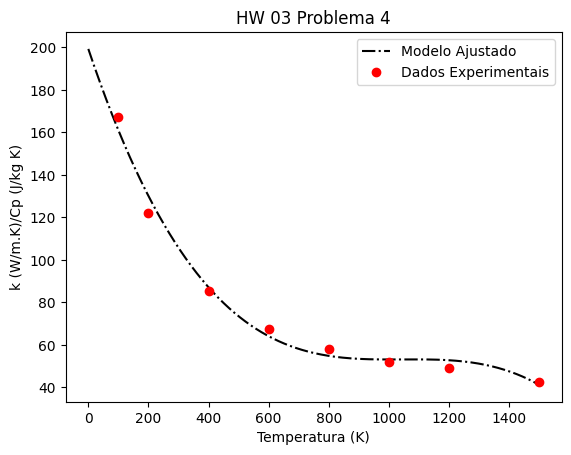

In [ ]:
# Dados Experimentais: Temperatura (K) e k (W/m.K)/Cp (J/kg K)
T = np.array([1e2, 2e2, 4e2, 6e2, 8e2, 1e3, 1.2e3, 1.5e3])
Cp = np.array([167, 122, 85.4, 67.4, 58.2,52.1,49.3,42.5])

# Sistema de Equações Mínimos Quadrados
ndata = len(T)
sx = np.sum(T)
sxx = np.sum(T**2)
sx3 = np.sum(T**3)
sx4 = np.sum(T**4)
sx5 = np.sum(T**5)
sx6 = np.sum(T**6)

sy = np.sum(Cp)
sxy = np.sum(T*Cp)
sx2y = np.sum(Cp*T**2)
sx3y = np.sum(Cp*T**3)

A = np.array([[ndata, sx, sxx, sx3],
              [sx, sxx, sx3, sx4],
              [sxx, sx3, sx4, sx5],
              [sx3, sx4, sx5, sx6]])

b = np.array([sy, sxy, sx2y,sx3y])

# Resolver o sistema linear A * coef = b
coef = [1,1,1,1]  # Chute Inicial

a0, a1, a2, a3 = linear_gauss_seidel(A,b,coef)

# Gerar a curva ajustada
Cp_calc = a0 + a1 * T + a2 * T**2 + a3*T**3
print(f'Modelo Quadrático: Cp = {a0} + {a1}T + {a2}T^2 + {a3}T^3')

# Plotar o gráfico dos dados experimentais e modelo ajustado
Tcalc = np.linspace(0,1500,1500)
Cp_calc = a0 + a1 * Tcalc + a2 * Tcalc**2 + a3*Tcalc**3

plt.plot(Tcalc, Cp_calc, '-.k', label='Modelo Ajustado')
plt.plot(T, Cp, 'or', label='Dados Experimentais')
plt.xlabel('Temperatura (K)')
plt.ylabel('k (W/m.K)/Cp (J/kg K)')
plt.title('HW 03 Problema 4')
plt.legend()
plt.show()
